In [ ]:
##IMPORT LIBRARIES REQUIRED

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras import layers,models


In [5]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [ ]:
#LOAD DATASET USING KERAS image_dataset_from_directory

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"TomatoVillage",batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=True
)

Found 16011 files belonging to 10 classes.


In [7]:
classnames=dataset.class_names

In [ ]:
#different types of classes

In [36]:
classnames

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [9]:
len(dataset) #501 batches with 32 images 

501

In [ ]:
#VISUALIZE THE DATA

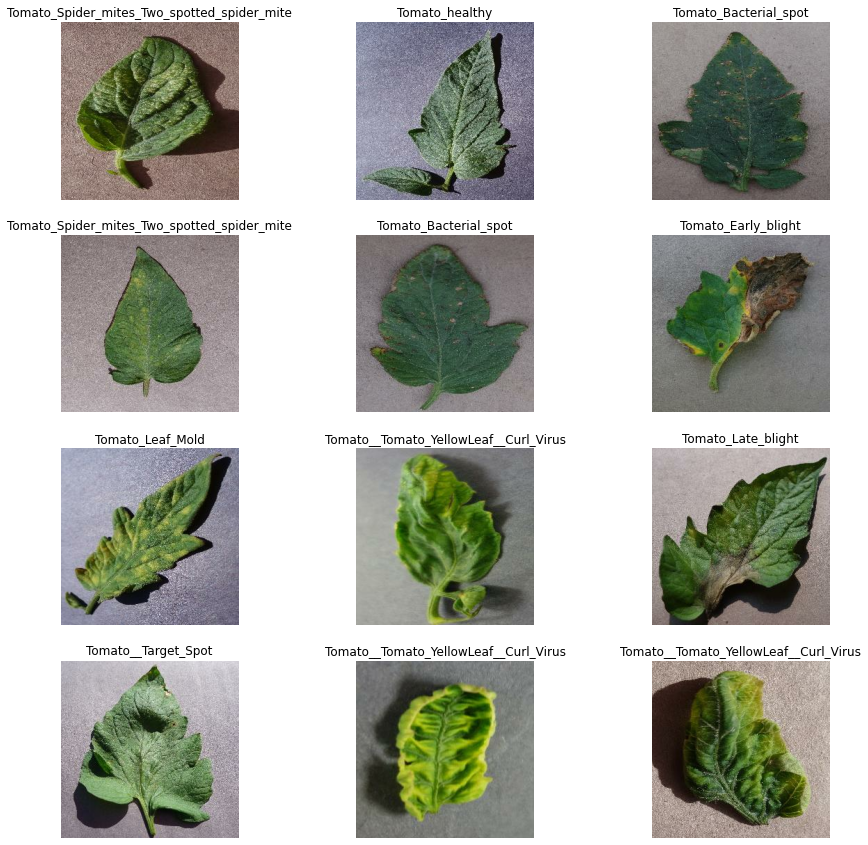

In [10]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classnames[label_batch[i]])
        plt.axis("off")

In [ ]:
#Split the Data

In [11]:
train_df=dataset.take(int(0.8*len(dataset)))
val_df=dataset.skip(int(0.8*len(dataset))).take(int(0.1*len(dataset)))
test_df=dataset.skip(int(0.8*len(dataset))).skip(int(0.1*len(dataset)))


In [12]:
print(len(train_df))
print(len(val_df))
print(len(test_df))

400
50
51


In [19]:
train_df=train_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_df=val_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_df=test_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)



In [13]:
rescale_and_resize=models.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE)
])

In [14]:
augment=models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)    
])

In [15]:
CHANNELS=3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)


model = models.Sequential([
    rescale_and_resize,
    augment,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history=model.fit(
    train_df,
    batch_size=BATCH_SIZE,
    validation_data=val_df,
    verbose=1,
    epochs=10
)

Epoch 1/10
400/400 [==============================] - 623s 2s/step - loss: 1.5687 - accuracy: 0.4393 - val_loss: 1.2985 - val_accuracy: 0.5581
Epoch 2/10
400/400 [==============================] - 684s 2s/step - loss: 1.0763 - accuracy: 0.6264 - val_loss: 1.2833 - val_accuracy: 0.5775
Epoch 3/10
400/400 [==============================] - 641s 2s/step - loss: 0.7955 - accuracy: 0.7214 - val_loss: 1.2861 - val_accuracy: 0.6469
Epoch 4/10
400/400 [==============================] - 597s 1s/step - loss: 0.5964 - accuracy: 0.7909 - val_loss: 1.6071 - val_accuracy: 0.5994
Epoch 5/10
400/400 [==============================] - 598s 1s/step - loss: 0.4990 - accuracy: 0.8237 - val_loss: 1.0329 - val_accuracy: 0.7088
Epoch 6/10
400/400 [==============================] - 609s 2s/step - loss: 0.4320 - accuracy: 0.8473 - val_loss: 0.9593 - val_accuracy: 0.7425
Epoch 7/10
400/400 [==============================] - 579s 1s/step - loss: 0.3474 - accuracy: 0.8753 - val_loss: 0.6823 - val_accuracy: 0.7950

In [19]:
scores=model.evaluate(test_df)

51/51 [==============================] - 27s 381ms/step - loss: 0.9211 - accuracy: 0.7865


In [20]:
scores

[0.921136736869812, 0.7864680290222168]

In [21]:
history.params


{'verbose': 1, 'epochs': 10, 'steps': 400}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

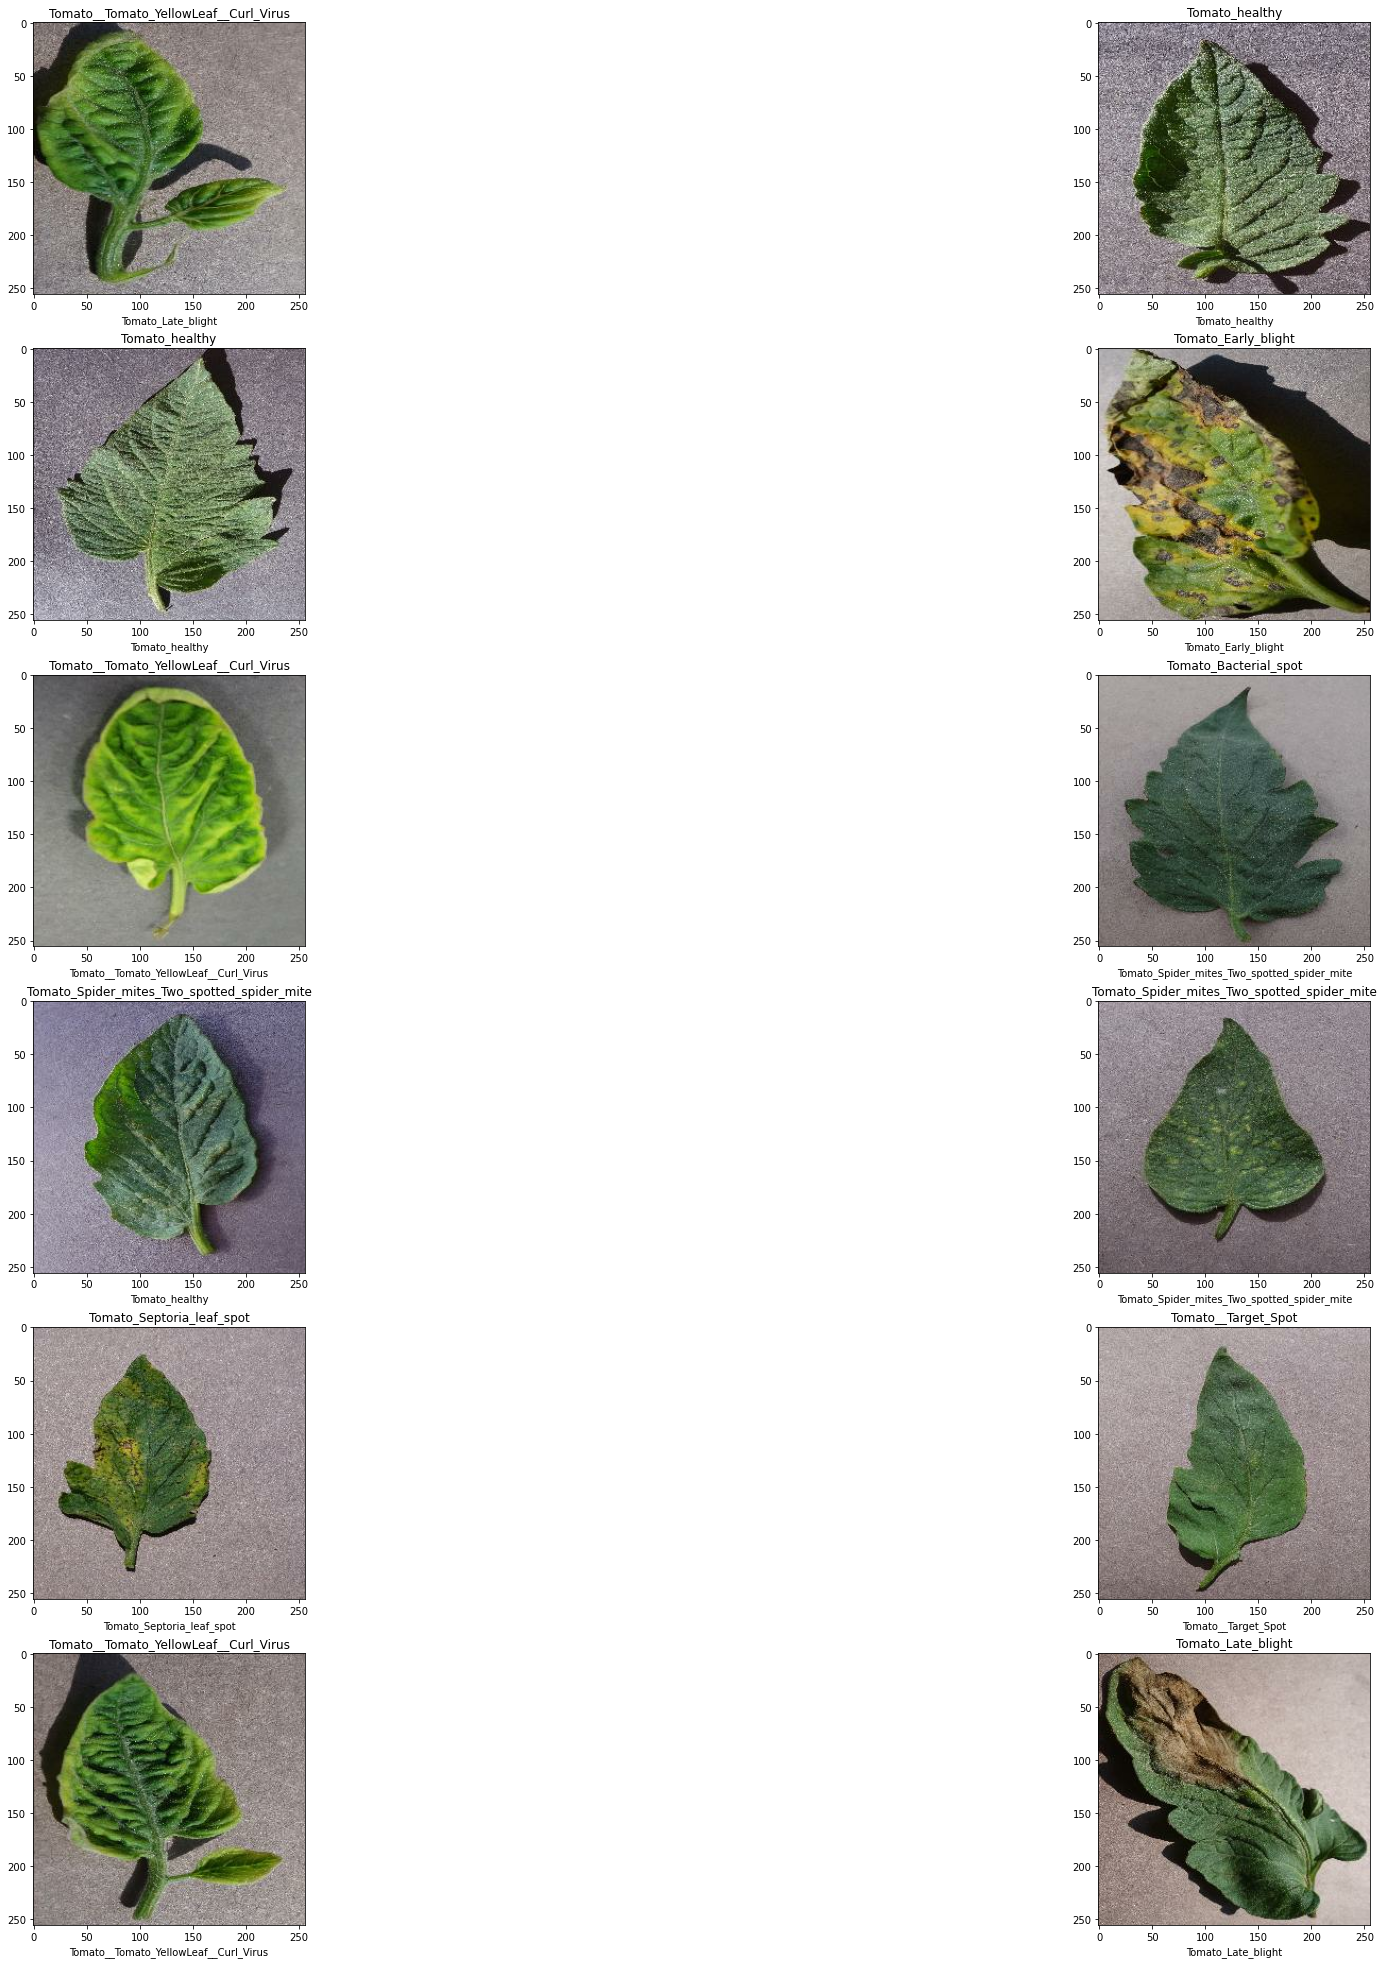

In [35]:
plt.figure(figsize=(35,35))
for image_batch,label_batch in test_df.take(1):
    for i in range(12):
        prediction=model.predict(image_batch)
        plt.subplot(6,2,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classnames[label_batch[i]])
        
        plt.xlabel(classnames[np.argmax(prediction[i])])
       
    
    